In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

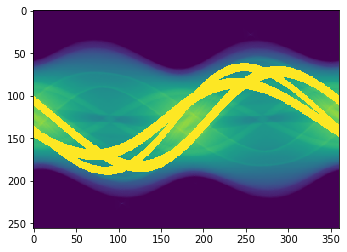

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [9]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(12780, 3, 3, 1)
(12780, 1)
Epoch 1/1000
400/400 [==============================] - 1s 2ms/step - loss: 5.2757 - accuracy: 0.0186
Epoch 2/1000
400/400 [==============================] - 1s 2ms/step - loss: 4.9795 - accuracy: 0.0203
Epoch 3/1000
400/400 [==============================] - 1s 2ms/step - loss: 4.9561 - accuracy: 0.0199
Epoch 4/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9379 - accuracy: 0.0204
Epoch 5/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9120 - accuracy: 0.0204
Epoch 6/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.8332 - accuracy: 0.0242
Epoch 7/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.3211 - accuracy: 0.0279
Epoch 8/1000
400/400 [==============================] - 1s 1ms/step - loss: 3.8444 - accuracy: 0.0459
Epoch 9/1000
400/400 [==============================] - 1s 1ms/step - loss: 3.6225 - accuracy: 0.0603
Epoch 10/1000
400/400 [==============================]

400/400 [==============================] - 1s 1ms/step - loss: 2.5501 - accuracy: 0.1571
Epoch 81/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5459 - accuracy: 0.1531
Epoch 82/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5205 - accuracy: 0.1653
Epoch 83/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5504 - accuracy: 0.1510
Epoch 84/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5379 - accuracy: 0.1536
Epoch 85/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5478 - accuracy: 0.1556
Epoch 86/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4945 - accuracy: 0.1663
Epoch 87/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5224 - accuracy: 0.1615
Epoch 88/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5268 - accuracy: 0.1579
Epoch 89/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4969 - a

400/400 [==============================] - 1s 2ms/step - loss: 2.3152 - accuracy: 0.1887
Epoch 160/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3153 - accuracy: 0.2018
Epoch 161/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1990
Epoch 162/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3360 - accuracy: 0.1950
Epoch 163/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3055 - accuracy: 0.1959
Epoch 164/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3160 - accuracy: 0.1998
Epoch 165/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3088 - accuracy: 0.1958
Epoch 166/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2880 - accuracy: 0.2015
Epoch 167/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3260 - accuracy: 0.1890
Epoch 168/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.1875 - accuracy: 0.2224
Epoch 238/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1848 - accuracy: 0.2235
Epoch 239/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2007 - accuracy: 0.2173
Epoch 240/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2032 - accuracy: 0.2149
Epoch 241/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1931 - accuracy: 0.2207
Epoch 242/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1975 - accuracy: 0.2178
Epoch 243/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2250 - accuracy: 0.2072
Epoch 244/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2190 - accuracy: 0.2116
Epoch 245/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1909 - accuracy: 0.2189
Epoch 246/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.1479 - accuracy: 0.2305
Epoch 316/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1536 - accuracy: 0.2285
Epoch 317/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1218 - accuracy: 0.2385
Epoch 318/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1435 - accuracy: 0.2319
Epoch 319/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1398 - accuracy: 0.2384
Epoch 320/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1414 - accuracy: 0.2302
Epoch 321/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1357 - accuracy: 0.2340
Epoch 322/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1338 - accuracy: 0.2333
Epoch 323/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1412 - accuracy: 0.2326
Epoch 324/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.0903 - accuracy: 0.2436
Epoch 394/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1145 - accuracy: 0.2411
Epoch 395/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0824 - accuracy: 0.2505
Epoch 396/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1182 - accuracy: 0.2396
Epoch 397/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1023 - accuracy: 0.2405
Epoch 398/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0878 - accuracy: 0.2487
Epoch 399/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0994 - accuracy: 0.2433
Epoch 400/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0804 - accuracy: 0.2535
Epoch 401/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0936 - accuracy: 0.2487
Epoch 402/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.0550 - accuracy: 0.2514
Epoch 472/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0729 - accuracy: 0.2502
Epoch 473/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0424 - accuracy: 0.2596
Epoch 474/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0634 - accuracy: 0.2482
Epoch 475/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0706 - accuracy: 0.2538
Epoch 476/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0529 - accuracy: 0.2543
Epoch 477/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0575 - accuracy: 0.2550
Epoch 478/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0428 - accuracy: 0.2595
Epoch 479/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0561 - accuracy: 0.2534
Epoch 480/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.0118 - accuracy: 0.2687
Epoch 550/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0227 - accuracy: 0.2642
Epoch 551/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0307 - accuracy: 0.2630
Epoch 552/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0201 - accuracy: 0.2628
Epoch 553/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0487 - accuracy: 0.2520
Epoch 554/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0025 - accuracy: 0.2688
Epoch 555/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0415 - accuracy: 0.2532
Epoch 556/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0343 - accuracy: 0.2570
Epoch 557/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0122 - accuracy: 0.2675
Epoch 558/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 1.9938 - accuracy: 0.2736
Epoch 628/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0199 - accuracy: 0.2603
Epoch 629/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9928 - accuracy: 0.2671
Epoch 630/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0050 - accuracy: 0.2617
Epoch 631/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0179 - accuracy: 0.2622
Epoch 632/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0058 - accuracy: 0.2714
Epoch 633/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0082 - accuracy: 0.2630
Epoch 634/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9927 - accuracy: 0.2717
Epoch 635/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0113 - accuracy: 0.2617
Epoch 636/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 1.9805 - accuracy: 0.2736
Epoch 706/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0076 - accuracy: 0.2678
Epoch 707/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9726 - accuracy: 0.2730
Epoch 708/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9958 - accuracy: 0.2658
Epoch 709/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9860 - accuracy: 0.2734
Epoch 710/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9841 - accuracy: 0.2653
Epoch 711/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9700 - accuracy: 0.2725
Epoch 712/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9815 - accuracy: 0.2713
Epoch 713/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9770 - accuracy: 0.2743
Epoch 714/1000
400/400 [==============================] - ETA: 0s - loss: 1.975

400/400 [==============================] - 1s 2ms/step - loss: 1.9617 - accuracy: 0.2808
Epoch 784/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9737 - accuracy: 0.2739
Epoch 785/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9678 - accuracy: 0.2783
Epoch 786/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9618 - accuracy: 0.2736
Epoch 787/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9560 - accuracy: 0.2865
Epoch 788/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9686 - accuracy: 0.2747
Epoch 789/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9799 - accuracy: 0.2742
Epoch 790/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9726 - accuracy: 0.2743
Epoch 791/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9590 - accuracy: 0.2835
Epoch 792/1000
400/400 [==============================] - 1s 2ms/step - loss: 1

400/400 [==============================] - 1s 2ms/step - loss: 1.9405 - accuracy: 0.2862
Epoch 862/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9476 - accuracy: 0.2791
Epoch 863/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9590 - accuracy: 0.2739
Epoch 864/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9372 - accuracy: 0.2871
Epoch 865/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9435 - accuracy: 0.2814
Epoch 866/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9609 - accuracy: 0.2822
Epoch 867/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9582 - accuracy: 0.2789
Epoch 868/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9506 - accuracy: 0.2822
Epoch 869/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9437 - accuracy: 0.2840
Epoch 870/1000
400/400 [==============================] - 1s 2ms/step - loss: 1

400/400 [==============================] - 1s 2ms/step - loss: 1.9463 - accuracy: 0.2798
Epoch 940/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9276 - accuracy: 0.2889
Epoch 941/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9400 - accuracy: 0.2862
Epoch 942/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9410 - accuracy: 0.2848
Epoch 943/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9336 - accuracy: 0.2882
Epoch 944/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9340 - accuracy: 0.2868
Epoch 945/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9489 - accuracy: 0.2767
Epoch 946/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9341 - accuracy: 0.2827
Epoch 947/1000
400/400 [==============================] - 1s 2ms/step - loss: 1.9275 - accuracy: 0.2926
Epoch 948/1000
400/400 [==============================] - 1s 2ms/step - loss: 1

In [10]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

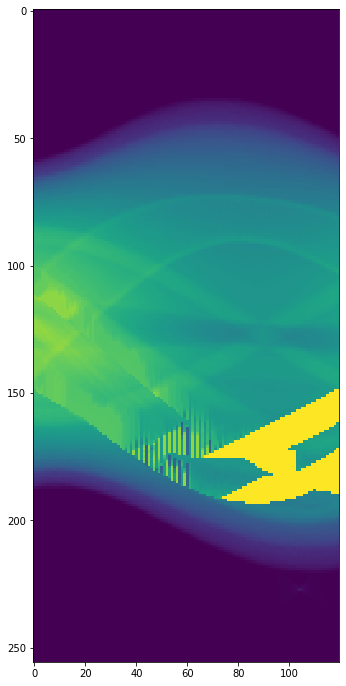

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:120])
plt.colorbar

In [12]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [13]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)